In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.io.wavfile import read
import scipy.io

# script importing
from peak_picking import *
from pca import *

# data loading
mat = scipy.io.loadmat(
    'data/isoint/isoint_2kHz_Level_20dB_TM45130.mat')

# NOT EVENLY SPACED!!!
fvect = mat['frekax'].flatten()  # frequency axis
Y = mat['Y'].flatten() # BM deviation
Yme = mat['Yme'].flatten() # stapes deviation
transfer_fcn = Y/Yme

freq_range = np.size(fvect)  # maximum index on the frequency axis


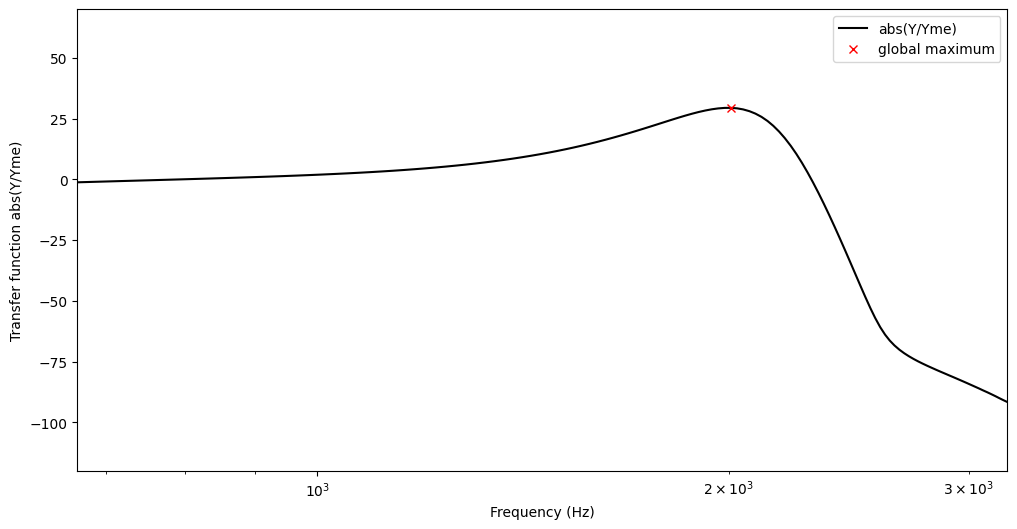

In [2]:
# sound wave in decibels
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(fvect, 20*np.log10(np.abs(transfer_fcn)), 'k', label='abs(Y/Yme)')

maximum = findGlobalMaximum(np.real(20*np.log10(np.abs(transfer_fcn))))
ax.plot(fvect[maximum], 20 *
        np.log10(np.abs(transfer_fcn)[maximum]), "rx", label='global maximum')

ax.set_xscale('log')
ax.set_xlim([fvect[0], fvect[-1]])
ax.set_ylim([-120, 70])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Transfer function abs(Y/Yme)')
ax.legend()
plt.show()
